In [52]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [53]:
from fastai import *
from fastai.text import *

In [43]:
# Title 37 - Patents, Trademarks and Copyrights
sample = 'data/code_of_federal_regulations/title-37-2017/CFR-2017-title37-vol1.xml'

In [44]:
sample

'data/code_of_federal_regulations/title-37-2017/CFR-2017-title37-vol1.xml'

In [45]:
import xml.etree.ElementTree as ET
tree = ET.parse(sample)
root = tree.getroot()

In [46]:
root

<Element 'CFRDOC' at 0x7f103cf27f28>

In [39]:
# for tag in root.iter():
# #     path = tree.getpath(tag)
# #     path = path.replace('/', '    ')
# #     spaces = Counter(path)
# #     tag_name = path.split()[-1].split('[')[0]
# #     tag_name = ' ' * (spaces[' '] - 4) + tag_name
#     print(tag)

In [57]:
path = Path('data/code_of_federal_regulations/title-37-2017')

In [94]:
f1 = open(path/'CFR-2017-title37-vol1.xml', 'r')
f2 = open(path/'CFR-2017-title37-vol1.txt', 'w')
for line in f1:
    f2.write(re.sub(r'<[^>]+>', ' ', line))
f1.close()
f2.close()

In [111]:
df = pd.read_csv(path/'CFR-2017-title37-vol1.txt', delimiter = "\t")

In [112]:
df.iloc[400:420]

,"July 1, 2017"
400,[Reserved]
401,1.121
402,Manner of making amendments i...
403,1.122-1.124
404,[Reserved]
405,1.125
406,Substitute specification.
407,1.126
408,Numbering of claims.
409,1.127


In [115]:
df.columns

Index(['   July 1, 2017 '], dtype='object')

In [125]:
df.count()

   July 1, 2017     29652
dtype: int64

In [55]:
bs=24

In [113]:
def no_filter(x):
    print(x)
    return True

In [120]:
data_lm = (TextList.from_df(df, path=path)                           
           #Inputs: all the text files in path
            .filter_by_func(no_filter) 
           #DONT NEED THIS. CARRYOVER FROM from_folder version
            .random_split_by_pct(0.1)
           #We randomly split and keep 10% for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('tmp_lm')

In [121]:
data_lm = TextLMDataBunch.load(path, 'tmp_lm', bs=bs)

In [122]:
data_lm.path

PosixPath('data/code_of_federal_regulations/title-37-2017')

In [123]:
data_lm.show_batch()

idx,text
0,"xxbos ( c ) xxmaj accounting periods and deposit . ( 1 ) xxmaj statements of xxmaj account shall cover semiannual accounting periods of xxmaj january 1 through xxmaj june 30 , and xxmaj july 1 through xxmaj december 31 , and shall be deposited in the xxmaj copyright xxmaj office , together with the total royalty fee for such accounting periods as prescribed by 17 u.s.c. xxunk ) through ( f ) , by no later than the immediately following xxmaj august 29 , if the xxmaj statement of xxmaj account covers the xxmaj"
1,"any paper by a party , whether a practitioner or non - practitioner , constitutes a certification under § 11.18(b ) of this subchapter . xxmaj violations of § xxunk ) of this subchapter by a party , whether a practitioner or non - practitioner , may result in the imposition of sanctions under § 11.18(c ) of this subchapter . xxmaj any practitioner violating § 11.18(b ) of this subchapter may also be subject to disciplinary action . xxmaj see § xxunk ) of this subchapter . xxbos 2.87(c)(1"
2,"the purposes of testing and review , subject to the condition that payment to the copyright owner is required after a person who has secured a copy decides to use the software . xxbos xxup subchapter b— xxup administration xxbos xxmaj source : xxbos 27 , ii xxbos § 401.5 xxbos 7 , iv xxbos § 382.3 xxbos xxmaj all applications submitted for registration shall supply the information required by the particular application and shall include a certification . xxmaj the certification shall consist of : xxbos ( iii ) xxmaj in the"
3,") xxmaj the provisions of paragraphs ( g)(1 ) through ( g)(3 ) of this section satisfy the requirements of 5 u.s.c. xxunk ) . xxbos 1.16 xxbos ( 1 ) xxmaj xxunk the practitioner 's efforts in accordance with paragraph ( b ) of this section the highest authority that can act on behalf of the organization xxunk upon or fails to address in a timely and appropriate manner an action , or a refusal to act , that is clearly a violation of law , and xxbos ( b ) xxmaj the term"
4,"xxmaj technical correction xxbos xxunk xxbos [ 73 fr 47689 , xxmaj aug. 14 , 2008 , as amended at 77 fr 45251 , xxmaj july 31 , 2012 ; 78 fr 20200 , xxmaj apr. 3 , 2013 ] xxbos xxmaj royalty rates and subscriber - based royalty floors for specific types of services . xxbos ( iii ) xxmaj appointments and / or revocations of power of attorney ; xxbos 2013 xxbos xxunk xxbos § 2.63 xxbos ( 2 ) xxmaj if the number of phonorecords that are returned during the month"
5,"longer appropriate must be signed by a party identified in § 1.33(b ) . xxmaj payment of a fee in other than the small entity amount is not sufficient notification that small entity status is no longer appropriate . xxbos xxup xii xxbos [ 65 fr xxunk , xxmaj sept. 8 , 2000 , as amended at 65 fr xxunk , xxmaj sept. 20 , 2000 ; 68 fr 38628 , xxmaj june 30 , 2003 ; 78 fr 62402 , xxmaj oct. 21 , 2013 ] xxbos xxmaj cross - references to related"
6,"the deposition record . xxbos xxmaj expert testimony ; tests and data . xxbos ( e ) xxmaj the appropriate filing fee , as required in § 201.3(c ) , is included with the submission or charged to an active deposit account . xxbos ( iii ) xxmaj the source of the intended first transmission of the work or works ; xxbos 65 fr 76777 , xxmaj dec. 7 , 2000 , unless otherwise noted . xxbos ( b ) xxmaj the xxunk ) and / or xxunk ) of the author , if"
7,"xxmaj united xxmaj states xxmaj postal xxmaj service xxmaj express xxmaj mail ) , the envelope should be addressed to : xxmaj copyright xxmaj royalty xxmaj board , p.o. xxmaj box xxunk , xxmaj xxunk xxmaj station , xxmaj washington , dc 20024 - xxunk . xxbos ( 4 ) xxmaj transmitting information to authorities pertinent to the processing of specific international applications . xxbos ( c ) xxmaj if an application does not fulfill the requirements of paragraphs ( a ) and ( b ) of this section , the applicant must pay the"
8,"information provided on the application is correct to the best of the

In [138]:
data_lm.vocab.itos[:30]

['xxunk',
 'xxpad',
 'xxmaj',
 'the',
 ',',
 'xxbos',
 'of',
 ')',
 '(',
 '.',
 'a',
 'to',
 'or',
 'in',
 'and',
 'for',
 'be',
 'by',
 'is',
 '§',
 ';',
 '\u2009',
 'an',
 'that',
 'application',
 'as',
 'this',
 'xxup',
 'under',
 'any']

In [142]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103, drop_mult=0.3)

In [143]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


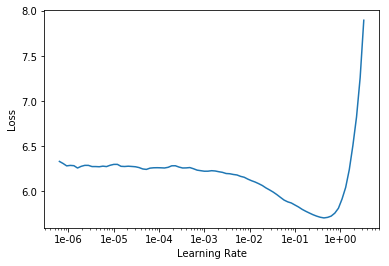

In [144]:
learn.recorder.plot()

In [145]:
learn.fit_one_cycle(1, 5e-1, moms=(0.8,0.7))

Total time: 00:22
epoch  train_loss  valid_loss  accuracy
1      5.997071                          (00:22)



In [146]:
learn.fit_one_cycle(1, 5e-1, moms=(0.8,0.7))

Total time: 00:22
epoch  train_loss  valid_loss  accuracy
1      6.529683                          (00:22)



In [ ]:
# not showing accuracy above???
# maybe because i ran this:

from fastai.callbacks import * 
learn.callbacks = [SaveModelCallback(learn)]

## Start again

In [149]:
data_lm2 = (TextList.from_df(df, path=path)                           
           #Inputs: all the text files in path
            .random_split_by_pct(0.1)
           #We randomly split and keep 10% for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm2.save('tmp_lm2')

In [150]:
data_lm2 = TextLMDataBunch.load(path, 'tmp_lm2', bs=bs)

In [151]:
data_lm2.show_batch()

idx,text
0,"xxbos xxmaj action by patent owner . xxbos 1.805 xxbos ( 2 ) xxmaj maintain appeal . xxmaj request that the appeal be maintained by filing a reply brief as set forth in § 41.41 . xxmaj such a reply brief must address as set forth in § xxunk ) each new ground of rejection and should follow the other requirements of a brief as set forth in § xxunk ) . a reply brief may not be accompanied by any amendment , affidavit ( § § 1.130 , 1.131 or"
1,and the registration fee set forth in § xxunk ) of this subchapter . xxmaj an individual seeking registration as an attorney under § xxunk ) must provide a certificate of good standing of the bar of the highest court of a xxmaj state that is no more than six months old . xxbos ( d ) xxmaj the international and search fees will be refunded if no international filing date is accorded or if the application is withdrawn before transmittal of the record copy to the xxmaj international xxmaj bureau ( xxup
2,"means the xxmaj common xxmaj regulations xxmaj under the 1999 xxmaj act and the 1960 xxmaj act of the xxmaj hague xxmaj agreement , and xxmaj hague xxmaj agreement xxmaj rule as used in this chapter means one of the xxmaj hague xxmaj agreement xxmaj regulations . xxbos xxunk xxbos ( c ) xxmaj notice of deposition . ( 1 ) xxmaj prior to the taking of testimony , all parties to the proceeding must agree on the time and place for taking testimony . xxmaj if the parties can not agree , the party"
3,"taking and passing of the examination is waived as provided in paragraph ( d ) of this section . xxmaj unless examination is waived pursuant to paragraph ( d ) of this section , each individual seeking registration must take and pass the registration examination to enable the xxup oed xxmaj director to determine whether the individual possesses the legal and competence qualifications specified in paragraphs ( a)(2)(ii ) and ( a)(2)(iii ) of this section . xxmaj an individual failing the examination may , upon receipt of notice of failure from xxup oed ,"
4,", such as a phone number , email address , and / or mailing address , to assist the xxmaj office in communicating with a requester and providing released records . xxbos ( iii ) xxmaj works submitted for registration in digital formats . a “ complete ” electronically filed work is one which is embodied in a digital file which contains : xxbos 63043 xxbos xxunk xxbos xxunk ) , 2.127(a ) xxbos ( 3 ) xxmaj new arguments responding to a new ground of rejection designated pursuant to § 41.50(b ) are"
5,") in an appeal may once , within the time limit for filing set forth in § 41.66 , file a respondent brief and serve the brief on all parties in accordance with § 1.903 of this title . xxbos ( 1 ) xxmaj international application fees ( xxmaj rule 12(1 ) ) ; and xxbos xxmaj level 8 xxbos xxmaj administration of patent rights clauses . xxbos 31 , vi xxbos xxmaj by a small entity ( § 1.27(a ) ) xxbos xxmaj occupational xxmaj safety and xxmaj health xxmaj administration"
6,"of all xxmaj covered xxmaj entities to be treated as xxmaj covered xxmaj entities hereunder upon written notice to xxup cpb . xxmaj in such a case , a prorated portion of the xxmaj license xxmaj fee for the remainder of the xxmaj term ( to the extent paid by xxup cpb ) shall , after deduction of any xxunk payable to the xxmaj collective by virtue of the breach or failure , be credited to statutory royalty obligations of xxmaj covered xxmaj entities to the xxmaj collective for the xxmaj term as specified by"
7,"the xxmaj copyright xxmaj royalty xxmaj judges , set forth in § 354.1 , shall also govern the mandatory referral of novel questions , except that the xxmaj register of xxmaj copyrights ' decision will be timely if it is delivered to the xxmaj copyright xxmaj royalty xxmaj judges within 30 days after the xxmaj register of xxmaj copyrights has received all of the briefs or comments of the participants . xxmaj the xxmaj copyright xxmaj royalty xxmaj judges will not issue a fi

In [174]:
data_lm2.vocab.itos[:30]

['xxunk',
 'xxpad',
 'xxmaj',
 'the',
 ',',
 'xxbos',
 'of',
 ')',
 '(',
 '.',
 'a',
 'to',
 'or',
 'in',
 'and',
 'for',
 'be',
 'by',
 'is',
 '§',
 ';',
 '\u2009',
 'an',
 'that',
 'as',
 'application',
 'this',
 'xxup',
 'under',
 'any']

In [153]:
learn2 = language_model_learner(data_lm2, pretrained_model=URLs.WT103, drop_mult=0.3)

In [154]:
learn2.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


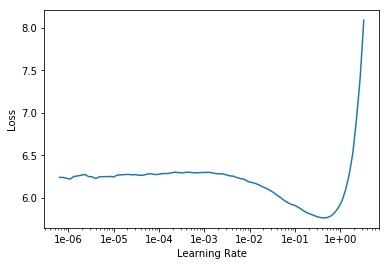

In [155]:
learn2.recorder.plot()

In [156]:
learn2.fit_one_cycle(1, 5e-1, moms=(0.8,0.7))

Total time: 00:23
epoch  train_loss  valid_loss  accuracy
1      6.049733    5.199365    0.203540  (00:23)



In [157]:
learn2.save('cfr-1')

In [158]:
learn2.fit_one_cycle(1, 5e-1, moms=(0.8,0.7))

Total time: 00:23
epoch  train_loss  valid_loss  accuracy
1      6.264086    5.345834    0.196515  (00:23)



In [159]:
learn2.fit_one_cycle(1, 5e-1, moms=(0.8,0.7))

Total time: 00:23
epoch  train_loss  valid_loss  accuracy
1      6.220157    5.295452    0.193412  (00:23)



In [160]:
learn2.fit_one_cycle(1, 5e-1, moms=(0.8,0.7))

Total time: 00:23
epoch  train_loss  valid_loss  accuracy
1      6.286542    5.335227    0.188552  (00:23)



In [161]:
learn2.load('cfr-1')

LanguageLearner(data=TextLMDataBunch;
Train: LabelList
y: LMLabel (26687 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: .
x: LMTextList (26687 items)
[Text xxbos xxmaj title 37, Text xxbos xxmaj patents , xxmaj trademarks , and xxmaj copyrights, Text xxbos xxmaj containing a codification of documents of general applicability and future effect, Text xxbos xxmaj as of xxmaj july 1 , 2017, Text xxbos xxmaj published by the xxmaj office of the xxmaj federal xxmaj register xxmaj national xxmaj archives and xxmaj records xxmaj administration as a xxmaj special xxmaj edition of the xxmaj federal xxmaj register]...
Path: data/code_of_federal_regulations/title-37-2017;
Valid: LabelList
y: LMLabel (2965 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: .
x: LMTextList (2965 items)
[Text xxbos ( 1 ) xxmaj when the contractor is not located in the xxmaj united xxmaj states or does not have a place of business located in the xxmaj united xxma

In [162]:
learn2.unfreeze()

In [163]:
learn2.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


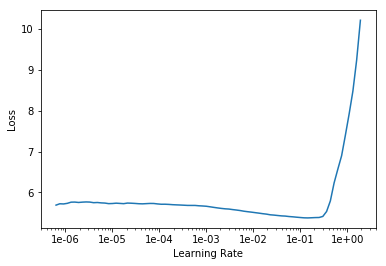

In [164]:
learn2.recorder.plot()

In [165]:
learn2.fit_one_cycle(2, 5e-2, moms=(0.8,0.7))

Total time: 00:58
epoch  train_loss  valid_loss  accuracy
1      4.204786    3.996714    0.309239  (00:29)
2      3.730015    3.607866    0.352164  (00:29)



In [166]:
learn2.save('cfr-2')

In [167]:
learn2.fit_one_cycle(2, 5e-2, moms=(0.8,0.7))

Total time: 00:59
epoch  train_loss  valid_loss  accuracy
1      3.902982    3.760692    0.330199  (00:29)
2      3.536049    3.448803    0.366818  (00:29)



In [168]:
learn2.save('cfr-3')

In [169]:
learn2.fit_one_cycle(2, 5e-2, moms=(0.8,0.7))

Total time: 00:58
epoch  train_loss  valid_loss  accuracy
1      3.725218    3.612498    0.343684  (00:29)
2      3.412882    3.351325    0.378003  (00:29)



In [170]:
learn2.save('cfr-4')

In [171]:
learn2.fit_one_cycle(2, 5e-2, moms=(0.8,0.7))

Total time: 00:58
epoch  train_loss  valid_loss  accuracy
1      3.672744    3.530003    0.353672  (00:29)
2      3.350599    3.297904    0.380560  (00:29)



In [172]:
learn2.save('cfr-5')

In [173]:
learn2.fit_one_cycle(2, 5e-2, moms=(0.8,0.7))

Total time: 00:58
epoch  train_loss  valid_loss  accuracy
1      3.682380    3.549102    0.346043  (00:29)
2      3.415163    3.359531    0.373259  (00:29)



In [175]:
learn2.fit_one_cycle(2, 5e-2, moms=(0.8,0.7))

Total time: 00:58
epoch  train_loss  valid_loss  accuracy
1      3.738040    3.591294    0.344648  (00:29)
2      3.404305    3.363669    0.372701  (00:29)



In [176]:
learn2.load('cfr-5')

LanguageLearner(data=TextLMDataBunch;
Train: LabelList
y: LMLabel (26687 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: .
x: LMTextList (26687 items)
[Text xxbos xxmaj title 37, Text xxbos xxmaj patents , xxmaj trademarks , and xxmaj copyrights, Text xxbos xxmaj containing a codification of documents of general applicability and future effect, Text xxbos xxmaj as of xxmaj july 1 , 2017, Text xxbos xxmaj published by the xxmaj office of the xxmaj federal xxmaj register xxmaj national xxmaj archives and xxmaj records xxmaj administration as a xxmaj special xxmaj edition of the xxmaj federal xxmaj register]...
Path: data/code_of_federal_regulations/title-37-2017;
Valid: LabelList
y: LMLabel (2965 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: .
x: LMTextList (2965 items)
[Text xxbos ( 1 ) xxmaj when the contractor is not located in the xxmaj united xxmaj states or does not have a place of business located in the xxmaj united xxma

In [177]:
learn2.predict('applicant', 10)

Total time: 00:00



'applicant seeking than 3 infringement 42.53 author . xxbos xxmaj misapprehended'

In [178]:
learn2.predict('patent', 10)

Total time: 00:00



'patent under paragraphs ( a normal the work is prepared and'

In [180]:
learn2.predict('software', 100, no_unk=True, temperature=1.1, min_p=0.001)

Total time: 00:05



'software of the name in another action is required by authorized entity not be filed or xxmaj patent or other than 3 : . xxmaj statement could not include ; 2 ; xxmaj board in 35 u.s.c. xxbos § \u2009 c to in 17 xxbos xxmaj statements of registration , in the invention , or persons , and includes , the xxup vii to enable . xxmaj deposit of that the design months in an interview of goods , and pay a certification that is carried to the xxmaj office that was served on response for format of service in the'

In [182]:
learn2.predict('open source', 100, no_unk=True, temperature=1.1, min_p=0.001)

Total time: 00:04



"open source of of that may , as provided in the registration and xxmaj statement is recorded recording of publication or adverse is not be filed with the following to deceive by the registration which be offered with : for must read to the xxmaj initial amendment with limited xxmaj non - owned ) 's . xxmaj public . xxmaj annual xxmaj right of the xxmaj copyright xxmaj qualified by the xxmaj united or on xxbos xxmaj copyright xxmaj non - part area u.s.c. xxmaj licensees under this based by the xxmaj january inventor , and its employee and the length to"

In [183]:
learn2.predict('open source license', 100, no_unk=True, temperature=1.1, min_p=0.001)

Total time: 00:04



'open source license , for in the xxmaj office . xxmaj statement is the xxmaj federal xxmaj copyright notice of the xxmaj january xxmaj office of the applicable cause of service as described have been subject invention submitted xxmaj saturday by the petition may be offered at the xxmaj office has be submitted xxmaj order ; or ( xxup foia within sixty . xxbos xxmaj copyright to the notice of record must be recorded xxmaj government by the correspondence of the xxmaj in § \u2009 xvii , a secrecy domain , the following and all motion for recording - as amended or is'